In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:

# 서울시 공공데이터는 보통 'cp949' 또는 'euc-kr' 인코딩을 사용합니다.
file_path = 'data/서울시 비상소화장치 위치정보.xlsx'

df = pd.read_excel(file_path)
# =========================================================
# [중요] 아래 변수에 실제 CSV 파일의 좌표 컬럼명을 입력해주세요.
# 예: 'X좌표', 'Y좌표' 또는 'X_CRD_LO', 'Y_CRD_LA' 등
x_col = 'X좌표'  # 실제 X 좌표 컬럼명으로 수정 필요
y_col = 'Y좌표'  # 실제 Y 좌표 컬럼명으로 수정 필요
# =========================================================

df2 = df[[x_col, y_col, '비상소화장치고유번호']]
df2.head()

,X좌표,Y좌표,비상소화장치고유번호
0,203839.5807,554251.2068,동대문-청량-034(
1,199533.4861,556623.5368,성북-길음-87(비)
2,201001.5919,557134.7855,성북-길음-168(비
3,203815.8539,556894.9788,성북-장위-89(비)
4,199433.4172,556587.2499,성북-길음-169(비


In [14]:
df2.to_csv('filtered_data/비상소화장치.csv', encoding = 'utf-8')

1. 배경 SHP 파일 로드 완료 (EPSG:5186)
2. 포인트 CSV 파일 로드 완료 (2594건)
3. 포인트 데이터 좌표 정의 완료 (EPSG:5186)

4. 지도 생성 중...
5. 완료! 지도가 '서울시_비상소화장치_위치도.png' 파일로 저장되었습니다.


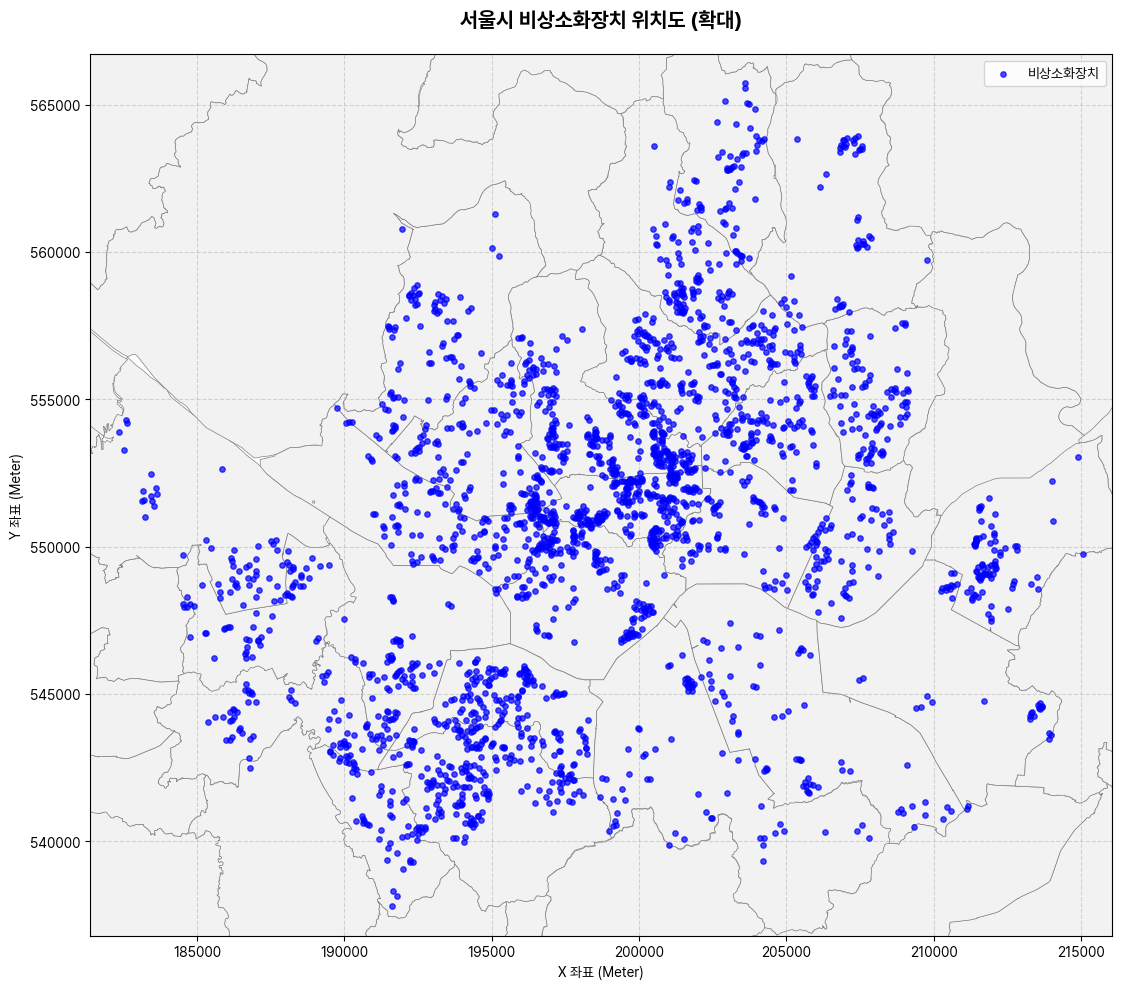

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================
# 1. 파일 경로 및 컬럼 설정
# ==============================================
# 배경지도로 사용할 시군구 경계 SHP 파일
shp_path = 'data/AL_D001_00_20251104(SIG)/AL_D001_00_20251104(SIG).shp'

# 비상소화장치 CSV 파일
csv_path = 'filtered_data/비상소화장치.csv' 

# CSV 파일 내의 X, Y 좌표 컬럼명
x_col = 'X좌표' 
y_col = 'Y좌표'

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Pretendard' # 윈도우 (없으면 'Malgun Gothic' 추천)
plt.rcParams['axes.unicode_minus'] = False

# ==============================================
# 2. 데이터 불러오기 (좌표 변환 없음)
# ==============================================
try:
    # 2-1. SHP 파일 로드
    gdf_bg = gpd.read_file(shp_path, encoding='cp949')
    
    # SHP 파일 좌표계 강제 설정 (EPSG:5186)
    gdf_bg.set_crs(epsg=5186, allow_override=True, inplace=True)
    
    print("1. 배경 SHP 파일 로드 완료 (EPSG:5186)")

    # 2-2. CSV 파일 로드
    df_points = pd.read_csv(csv_path, encoding='utf-8')
    print(f"2. 포인트 CSV 파일 로드 완료 ({len(df_points)}건)")

except FileNotFoundError:
    print("\n[오류] 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 2-3. CSV를 GeoDataFrame으로 변환 (EPSG:5186 정의)
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points[x_col], df_points[y_col]),
    crs="EPSG:5186"
)
print("3. 포인트 데이터 좌표 정의 완료 (EPSG:5186)")


# ==============================================
# 3. 시각화 (범위 설정 추가됨)
# ==============================================
print("\n4. 지도 생성 중...")
fig, ax = plt.subplots(figsize=(12, 10))

# 3-1. 배경지도 그리기
gdf_bg.plot(
    ax=ax,
    color='#f2f2f2',
    edgecolor='grey',
    linewidth=0.5,
    zorder=1
)

# 3-2. 포인트 그리기
gdf_points.plot(
    ax=ax,
    color='blue',      
    marker='o',
    markersize=15,    # 잘 보이도록 크기 약간 키움
    alpha=0.7,
    label='비상소화장치',
    zorder=2
)

# -------------------------------------------------------
# [추가된 부분] 지도 범위 설정 (서울만 보이게 하기)
# -------------------------------------------------------
# 포인트 데이터(서울)가 있는 전체 사각형 범위 계산
minx, miny, maxx, maxy = gdf_points.total_bounds

# 지도 가장자리에 여백(Margin) 주기 (단위: 미터)
margin = 1000 

# 계산된 범위로 지도 보여주는 영역 고정
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)
# -------------------------------------------------------

# 3-3. 그래프 꾸미기
ax.set_title('서울시 비상소화장치 위치도 (확대)', fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('X 좌표 (Meter)')
ax.set_ylabel('Y 좌표 (Meter)')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
ax.ticklabel_format(style='plain') # 과학적 표기법 제거

plt.tight_layout()

# -------------------------------------------------------
# [추가된 부분] 이미지 파일로 저장하기
# -------------------------------------------------------
output_filename = "./ree서울시_비상소화장치_위치도.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"5. 완료! 지도가 '{output_filename}' 파일로 저장되었습니다.")

plt.show()

1. 서울시 GeoJSON 로드 및 변환 완료 (EPSG:5186)
2. 포인트 CSV 파일 로드 완료 (2594건)
3. 포인트 데이터 좌표 정의 완료 (EPSG:5186)

4. 지도 생성 중...
5. 완료! 지도가 'results/서울시_비상소화장치_분포도.png' 파일로 저장되었습니다.


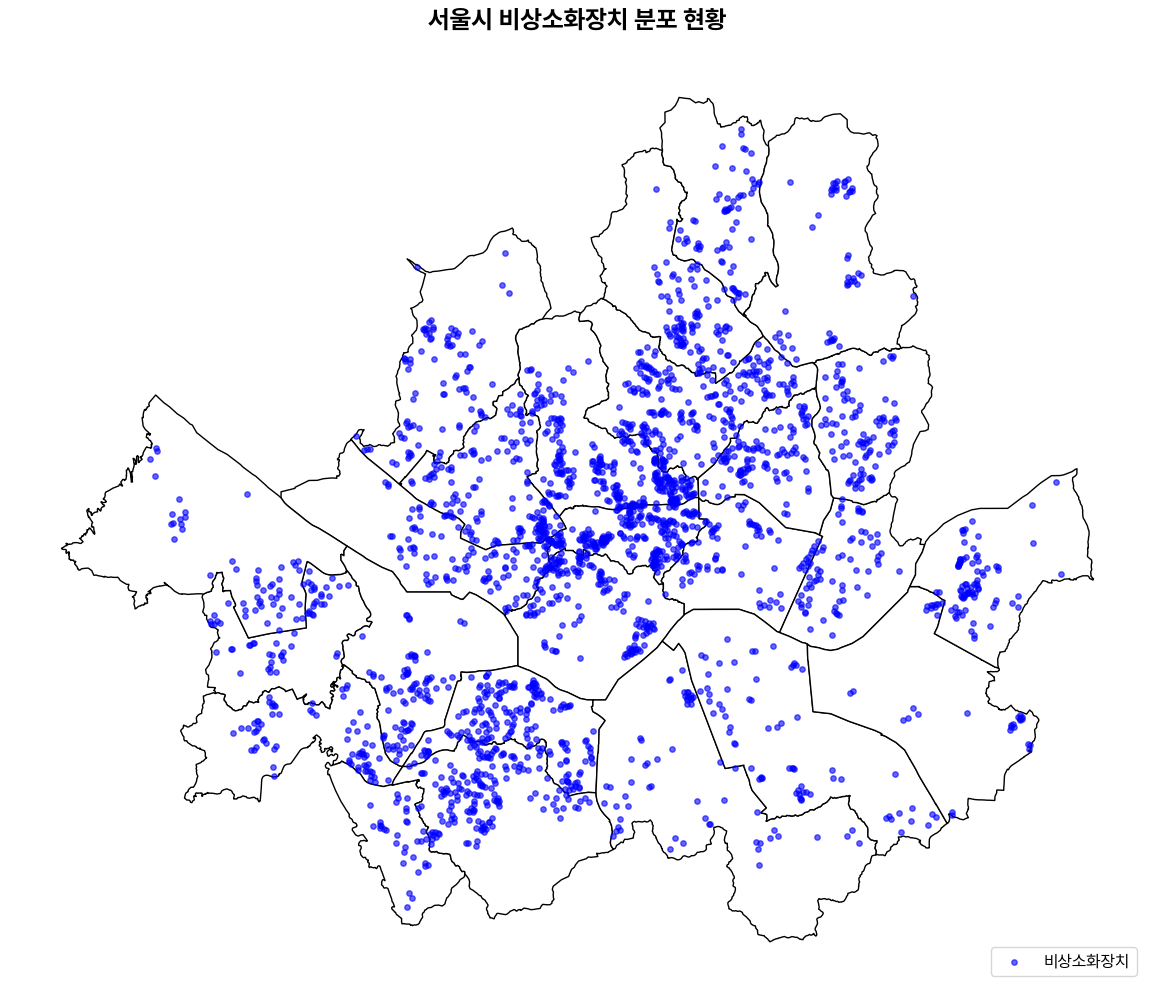

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================
# 1. 파일 경로 설정
# ==============================================
# [변경됨] 배경지도로 사용할 서울시 자치구 GeoJSON 파일
geojson_path = 'data/서울시_자치구_2018.geojson'

# 비상소화장치 CSV 파일
csv_path = 'filtered_data/비상소화장치.csv' 
x_col = 'X좌표' 
y_col = 'Y좌표'

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Pretendard' # 윈도우 (없으면 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ==============================================
# 2. 데이터 불러오기 및 좌표계 통일
# ==============================================
try:
    # 2-1. [배경] 서울시 GeoJSON 로드
    gdf_seoul = gpd.read_file(geojson_path)
    
    # -----------------------------------------------------------
    # [중요] 좌표계 변환 과정
    # GeoJSON은 보통 위경도(EPSG:4326)입니다.
    # 포인트 데이터(EPSG:5186)와 맞추기 위해 배경지도를 변환합니다.
    # -----------------------------------------------------------
    if gdf_seoul.crs is None:
        gdf_seoul.set_crs(epsg=4326, inplace=True) # 좌표계가 없다면 4326으로 가정
    
    # 서울시 지도를 5186(미터 단위)으로 변환
    gdf_seoul = gdf_seoul.to_crs(epsg=5186)
    
    print("1. 서울시 GeoJSON 로드 및 변환 완료 (EPSG:5186)")

    # 2-2. [포인트] CSV 파일 로드
    df_points = pd.read_csv(csv_path, encoding='utf-8')
    print(f"2. 포인트 CSV 파일 로드 완료 ({len(df_points)}건)")

except FileNotFoundError:
    print("\n[오류] 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()

# 2-3. CSV를 GeoDataFrame으로 변환 (EPSG:5186)
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points[x_col], df_points[y_col]),
    crs="EPSG:5186"
)
print("3. 포인트 데이터 좌표 정의 완료 (EPSG:5186)")


# ==============================================
# 3. 시각화
# ==============================================
print("\n4. 지도 생성 중...")
fig, ax = plt.subplots(figsize=(12, 10))

# 3-1. 서울시 배경 그리기 (자치구 경계)
gdf_seoul.plot(
    ax=ax,
    color='white',      # 배경색 흰색
    edgecolor='black',  # 경계선 검은색
    linewidth=1.0,      # 경계선 두께
    zorder=1
)

# 3-2. 비상소화장치 포인트 그리기
gdf_points.plot(
    ax=ax,
    color='blue',      
    marker='o',
    markersize=15, 
    alpha=0.6,          # 점들이 많으므로 투명도를 조금 더 줌
    label='비상소화장치',
    zorder=2
)

# 3-3. 그래프 꾸미기
# 이제 배경 자체가 서울이므로 별도의 범위 제한(xlim, ylim)이 필요 없습니다.
ax.set_title('서울시 비상소화장치 분포 현황', fontsize=18, fontweight='bold', pad=20)
ax.set_axis_off() # X, Y축 눈금 제거 (깔끔한 지도를 위해)

# 범례 추가 (위치 조정)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()

# 이미지 저장
output_filename = "results/서울시_비상소화장치_분포도.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"5. 완료! 지도가 '{output_filename}' 파일로 저장되었습니다.")

plt.show()

In [21]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# ==============================================
# 1. 파일 경로 설정
# ==============================================
geojson_path = 'data/서울시_자치구_2018.geojson'
csv_path = 'filtered_data/비상소화장치.csv'
x_col = 'X좌표'
y_col = 'Y좌표'

# ==============================================
# 2. 데이터 로드 및 좌표 변환 (핵심 단계!)
# ==============================================
# 2-1. [배경] 서울시 GeoJSON 로드
gdf_seoul = gpd.read_file(geojson_path)

# GeoJSON이 혹시 4326이 아닐 경우를 대비해 변환 (Folium은 4326만 씀)
if gdf_seoul.crs is None:
    gdf_seoul.set_crs(epsg=4326, inplace=True)
else:
    gdf_seoul = gdf_seoul.to_crs(epsg=4326)

# 2-2. [포인트] CSV 로드 및 GeoDataFrame 변환
df_points = pd.read_csv(csv_path, encoding='utf-8')

# (1) 먼저 원본 좌표계(EPSG:5186)로 정의
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points[x_col], df_points[y_col]),
    crs="EPSG:5186"
)

# (2) Folium용 위경도 좌표계(EPSG:4326)로 변환
gdf_points_4326 = gdf_points.to_crs(epsg=4326)

print("좌표 변환 완료: EPSG:5186 -> EPSG:4326")

# ==============================================
# 3. Folium 지도 생성
# ==============================================

# 3-1. 지도 중심 잡기 (서울시 중심)
# 서울의 대략적 중심 좌표: [37.55, 126.99]
# 또는 데이터의 평균 위치를 사용
center_lat = gdf_points_4326.geometry.y.mean()
center_lon = gdf_points_4326.geometry.x.mean()

m = folium.Map(
    location=[center_lat, center_lon], 
    zoom_start=11,
    tiles='cartodbpositron' # 깔끔한 밝은 배경 (OpenStreetMap 등 변경 가능)
)

# 3-2. 서울시 자치구 경계 표시 (GeoJSON)
folium.GeoJson(
    gdf_seoul,
    name='서울시 자치구',
    style_function=lambda x: {
        'fillColor': 'transparent', # 내부는 투명하게
        'color': 'black',           # 경계선 색상
        'weight': 1.5,              # 경계선 두께
        'dashArray': '5, 5'         # 점선 처리
    }
).add_to(m)

# 3-3. 비상소화장치 마커 추가 (MarkerCluster 사용)
# 포인트가 많으면 브라우저가 느려지므로, 뭉쳐서 보여주는 클러스터링 적용
marker_cluster = MarkerCluster().add_to(m)

# 변환된 위경도 데이터에서 좌표 추출하여 마커 추가
# (데이터가 너무 많으면 상위 1000개만 테스트해보세요)
for idx, row in gdf_points_4326.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x], # [위도, 경도] 순서 주의
        popup="비상소화장치",
        icon=folium.Icon(color='red', icon='fire', prefix='fa') # 불 아이콘
    ).add_to(marker_cluster)

# ==============================================
# 4. 저장
# ==============================================
output_html = "results/서울시_비상소화장치_지도.html"
m.save(output_html)
print(f"완료! '{output_html}' 파일이 생성되었습니다. 웹 브라우저로 열어보세요.")

좌표 변환 완료: EPSG:5186 -> EPSG:4326
완료! 'results/서울시_비상소화장치_지도.html' 파일이 생성되었습니다. 웹 브라우저로 열어보세요.
